In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import Image

np.set_printoptions(suppress=True, precision=3)

my_predictions = {}
f2_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def f2_eval(name_, pred, actual):
    global f2_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    r2 = r2_score(pred, actual)
    f2_predictions[name_] = r2

    y_value = sorted(f2_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f2'])
    print(df)
    min_ = df['f2'].min() - 10
    max_ = df['f2'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f2'], height=0.3)
    
    for i, v in enumerate(df['f2']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('f2 score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

def add_f2_model(name_, pred, actual):
    global f2_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    r2 = r2_score(pred, actual)
    f2_predictions[name_] = r2
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def f2_plot_all():
    global f2_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(f2_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'f2'])
    print(df)
    min_ = df['f2'].min() - 10
    max_ = df['f2'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['f2'], height=0.3)
    
    for i, v in enumerate(df['f2']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('f2 score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

# 1. 데이터를 불러옴 

In [5]:
df = pd.read_csv("data/서울시 부동산 전월세가 정보_2022.csv", encoding='cp949')
df.head()

C:\Users\sujong\AppData\Local\Temp\ipykernel_21256\1116531002.py:1: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/서울시 부동산 전월세가 정보_2022.csv", encoding='cp949')


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규갱신여부,계약갱신권사용여부,종전 보증금,종전 임대료
0,2022,11350,노원구,10500,상계동,1.0,대지,1264.0,0.0,12.0,...,2676,2,은빛3단지,1998.0,아파트,NaN,NaN,NaN,NaN,NaN
1,2022,11170,용산구,10100,후암동,1.0,대지,406.0,73.0,2.0,...,19845,0,(406-73),2008.0,연립다세대,NaN,NaN,NaN,NaN,NaN
2,2022,11260,중랑구,10400,묵동,1.0,대지,169.0,12.0,12.0,...,3000,49,로프트원태릉입구역,2020.0,아파트,NaN,NaN,NaN,NaN,NaN
3,2022,11740,강동구,10500,길동,1.0,대지,407.0,3.0,4.0,...,18900,4,(407-3),2010.0,연립다세대,NaN,NaN,NaN,NaN,NaN
4,2022,11500,강서구,10900,방화동,1.0,대지,839.0,0.0,4.0,...,16000,20,방화그린,1993.0,아파트,NaN,NaN,NaN,NaN,NaN


In [6]:
# df['전월세 구분'].value_counts()    전월세 갯수확인

자치구 종류  
송파구     16437  관악구     14070  강남구     12654  마포구     10294  강서구     10220  동작구      9485  
강동구      9305  광진구      9212  서초구      8640  동대문구     7054  영등포구     6927  노원구      6779  
중랑구      6651  성북구      6537  은평구      6494  구로구      6404  성동구      5751  서대문구     5603  
양천구      5175  금천구      4244  용산구      4006  강북구      3780  도봉구      3434  종로구      2467  
중구       2440

In [7]:
df_sub = df.loc[df['전월세 구분']=='월세']         # 월세건
songpa = df_sub.loc[df_sub['자치구명']=='송파구']  # 자치구 선택 ! 
songpa_gangsin = songpa.loc[songpa['신규갱신여부']=='갱신']  # 갱신 -> 종전 임대료 종전 보증금 있는 데이터만 사용
songpa_gangsin['층']=songpa_gangsin['층'].fillna(1) # 층이 없는 null 값 1로 채워줌

C:\Users\sujong\AppData\Local\Temp\ipykernel_21256\2716916115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songpa_gangsin['층']=songpa_gangsin['층'].fillna(1) # 층이 없는 null 값 1로 채워줌


널값 확인

In [8]:
songpa_gangsin.isnull().sum()

접수연도            0
자치구코드           0
자치구명            0
법정동코드           0
법정동명            0
지번구분          155
지번구분명         155
본번            154
부번            154
층               0
계약일             0
전월세 구분          0
임대면적(㎡)         0
보증금(만원)         0
임대료(만원)         0
건물명           154
건축년도           29
건물용도            0
계약기간          133
신규갱신여부          0
계약갱신권사용여부    1096
종전 보증금          0
종전 임대료          0
dtype: int64

법정동은 일단 써보자
지번구분, 지번구분명, 본번, 부번, 건물명, 계약일(2022 데이터 사용하니까 일단 빼고 해봄), 전월세 구분, 계약기간, 신규갱신여부, 계약갱신권사용여부, 자치구코드, 자치구명<-본 데이터에서 할땐 넣는게 나을듯>, 법정동코드, 접수연도(일단 여기선빼고 하기)

In [9]:
songpa_train = songpa_gangsin.drop(['지번구분', '지번구분명', '본번', '부번', '건물명', '계약일', '전월세 구분', '계약기간', '신규갱신여부', '계약갱신권사용여부', '자치구코드', '자치구명', '법정동코드', '접수연도'], axis=1)
songpa_dum = pd.get_dummies(data = songpa_train, columns=['법정동명']) # 법정동 라벨인코딩
songpa_dum = songpa_dum.loc[songpa_dum['건물용도']!='아파트'] # 아파트 제거 구별로 어떻게 할지 생각 해봐야할듯
songpa_dum = pd.get_dummies(data = songpa_dum, columns=['건물용도']) # 건물용도 라벨인코딩
songpa_dum=songpa_dum.dropna()      #  건축년도 null값 제거
songpa_dum = songpa_dum.loc[songpa_dum['종전 임대료']>0]

In [10]:
# df_sub['자치구명'].value_counts()
# songpa['신규갱신여부'].value_counts() 신규 갱신 갯수 알아보기용
# songpa_gangsin['부번'].unique() 부번의 종류

층이 없는 건물은 단독다가구 -> 층의 null 값을 1로 변경

In [11]:
# songpa_gangsin.loc[songpa_gangsin['층'].isnull(), '건물용도'].unique() 층이 없는 건물은 다 단독 다가구
# songpa_gangsin['계약갱신권사용여부'].unique()  계약 갱신권은 O 아니면 nan 뿐임

계약갱신권컬럼 사용할거면 사용 한거 1 안한거 0으로 주고 하면 될듯?

In [12]:
# songpa_gangsin['건물용도'].value_counts()  건물수 알아보기 아파트 794 연립다세대 791 오피스텔 300 단독다가구 155

건물명을 쓰지 않기 위해서 아파트를 뺀다..?

In [13]:
# len(songpa_gangsin.loc[songpa_gangsin['건물용도']=='아파트', '건물명'].value_counts())  아파트의 건물명120개더라
# len(songpa_gangsin['건물명'].value_counts())   송파구 전체 건물명은 764개더라 -> 컬럼으로 사용하기 부적절한듯
# len(songpa_gangsin['층'].value_counts())  층의 종류가 몇개 있는지

건축년도가 건물명을 대체해줄수 있지 않을까?

In [14]:
# songpa_gangsin['접수연도'].value_counts()   2022년
# songpa_gangsin.loc[songpa_gangsin['건물명'].isnull(), '건물용도'].unique()  단독 다가구는 건물명이 없다.
# len(songpa_gangsin['법정동명'].unique())
# songpa_dum['종전 임대료'].value_counts()  종전 임대료의 갯수 확인

## (월세)모델에 넣을 데이터 전처리!!

In [24]:
songpa_dum.sort_values('임대료(만원)',ascending=True ,inplace=True)
songpa_dum

,층,임대면적(㎡),보증금(만원),임대료(만원),건축년도,종전 보증금,종전 임대료,법정동명_가락동,법정동명_거여동,법정동명_마천동,...,법정동명_석촌동,법정동명_송파동,법정동명_신천동,법정동명_오금동,법정동명_잠실동,법정동명_장지동,법정동명_풍납동,건물용도_단독다가구,건물용도_연립다세대,건물용도_오피스텔
319390,2.0,36.58,19000,2,2003.0,19000.0,2.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
305305,12.0,21.06,14544,3,2017.0,13800.0,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
136334,4.0,50.86,22000,3,2002.0,20000.0,3.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
256498,3.0,17.16,16300,3,2015.0,15500.0,3.0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
254034,2.0,21.24,15000,3,2003.0,1000.0,39.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173281,6.0,38.80,2000,138,2015.0,2000.0,132.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
261988,2.0,74.47,4000,142,2015.0,4000.0,135.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
161014,4.0,59.40,3000,158,2016.0,3000.0,150.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
268655,4.0,61.34,2500,174,2014.0,2500.0,165.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(songpa_dum.drop('임대료(만원)', 1), songpa_dum['임대료(만원)'], random_state=0)

C:\Users\sujong\AppData\Local\Temp\ipykernel_21256\1362039182.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(songpa_dum.drop('임대료(만원)', 1), songpa_dum['임대료(만원)'], random_state=0)


## 데이터 정렬 종전 임대료 가격순으로 오름차순 정렬 test 값들만 

In [56]:
# y_train.sort_values(ascending=True, inplace=True)
y_test.sort_values(ascending=True, inplace=True)
x_test = x_test.loc[y_test.index]
# x_train.loc[y_train.index]

### 1. LinearRegression 모델 성능 평가

LinearRegression mse :  18.922120488585836
우리가 임의로 정한 정확도 월세 오차 10이내 :  0.9688715953307393
r2_score :  0.9742318699473624


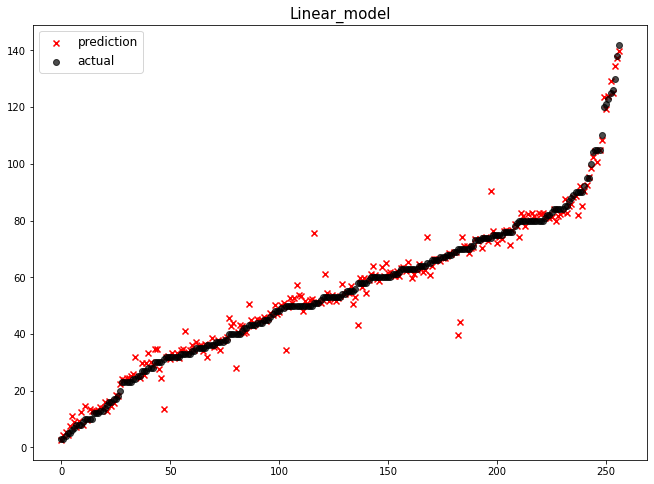

          model       mse
0  Linear_model  18.92212


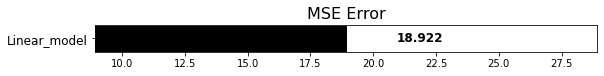

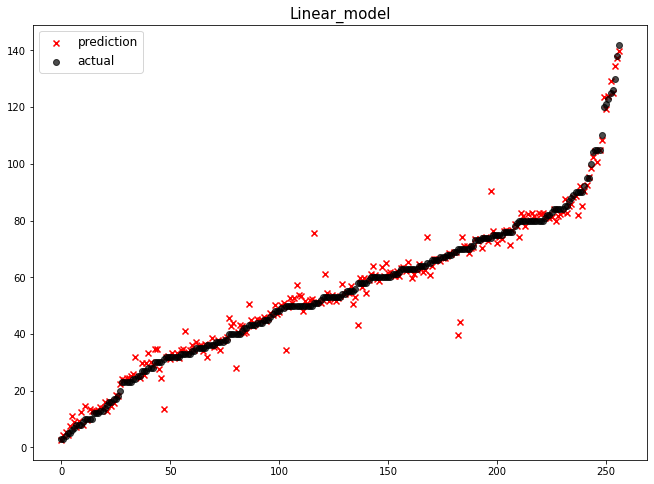

          model        f2
0  Linear_model  0.973723


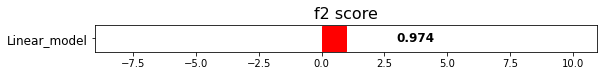

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression().fit(x_train, y_train)
pred = model.predict(x_test)
print('LinearRegression mse : ',mean_squared_error(y_test, pred))
print('우리가 임의로 정한 정확도 월세 오차 10이내 : ',(abs(y_test - pred)<10).mean())
print('r2_score : ', r2_score(y_test, pred))
add_model('Linear_model', pred, y_test)
plot_all()
add_f2_model('Linear_model', pred, y_test)
f2_plot_all()

In [17]:
# import matplotlib.pyplot as plt
# import numpy as np

In [18]:
# x = np.arange(503)
# plt.figure(figsize=(20, 20))
# plt.plot(x, pred, color='r', label='pred')   # 예측값
# plt.scatter(x, y_test, label='data')   # 실제값
# plt.legend(fontsize=18)
# plt.show()

### 2. DecisionTreeRegressor 모델 성능 평가

In [19]:
from sklearn.tree import DecisionTreeRegressor
treemodel = DecisionTreeRegressor(max_depth=5, random_state=0, min_samples_split=10).fit(x_train, y_train)
tree_pred = treemodel.predict(x_test)
print('LinearRegression mse : ',mean_squared_error(y_test, tree_pred))
print('우리가 임의로 정한 tree 정확도 월세 오차 10이내 : ',(abs(y_test - tree_pred)<10).mean())
print('tree_r2_score : ', r2_score(y_test, tree_pred))

LinearRegression mse :  55.01330896625817
우리가 임의로 정한 tree 정확도 월세 오차 10이내 :  0.9066147859922179
tree_r2_score :  0.9293626899929494


### 샘플 데이터 하나씩 뽑아보면서 확인해보기

In [50]:
sampledata_y=y_test.iloc[[10],]
print('임의로 뽑은 정답 데이터', sampledata_y)
sampledata_x=x_test.iloc[[10],]
sampledata_x[['종전 임대료', '종전 보증금', '보증금(만원)']]

임의로 뽑은 정답 데이터 185286    9
Name: 임대료(만원), dtype: int64


,종전 임대료,종전 보증금,보증금(만원)
185286,9.0,13000.0,13800


모델 예측 결과

In [51]:
print('모델의 예측 결과 : ', model.predict(sampledata_x))

모델의 예측 결과 :  [6.905]


### 라소 모델 돌리면서 지표들 시각화하기!

In [52]:
from sklearn.linear_model import Lasso

alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

c:\Users\sujong\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.170e+03, tolerance: 5.395e+01
  model = cd_fast.enet_coordinate_descent(


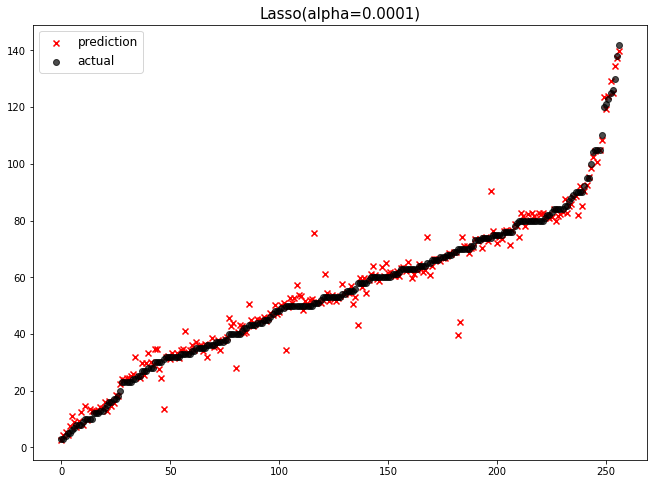

                 model        mse
0     Lasso(alpha=100)  45.274462
1      Lasso(alpha=10)  19.611709
2       Lasso(alpha=1)  19.483916
3     Lasso(alpha=0.1)  19.149125
4         Linear_model  18.922120
5  Lasso(alpha=0.0001)  18.921436
6   Lasso(alpha=0.001)  18.915819
7    Lasso(alpha=0.01)  18.882317


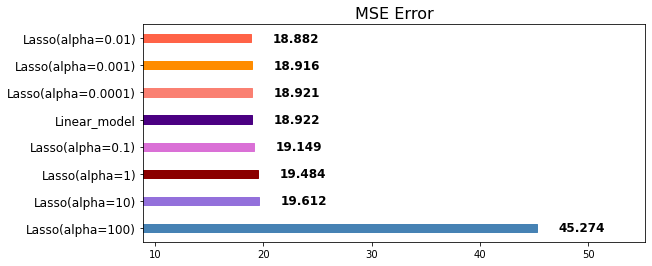

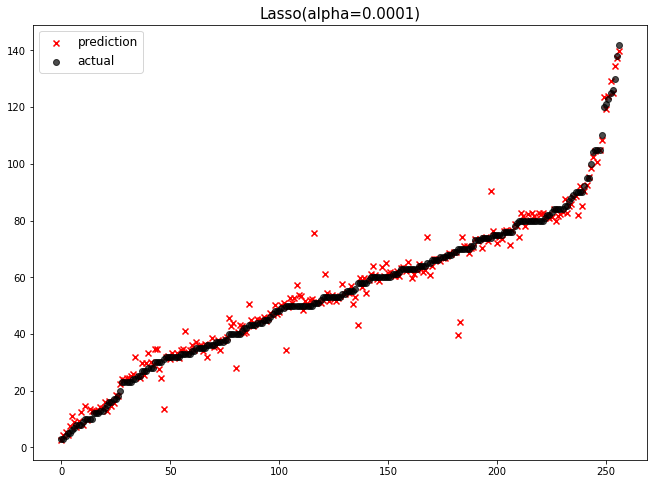

                 model        f2
0    Lasso(alpha=0.01)  0.973799
1   Lasso(alpha=0.001)  0.973734
2  Lasso(alpha=0.0001)  0.973724
3         Linear_model  0.973723
4     Lasso(alpha=0.1)  0.973414
5       Lasso(alpha=1)  0.972895
6      Lasso(alpha=10)  0.971861
7     Lasso(alpha=100)  0.910691


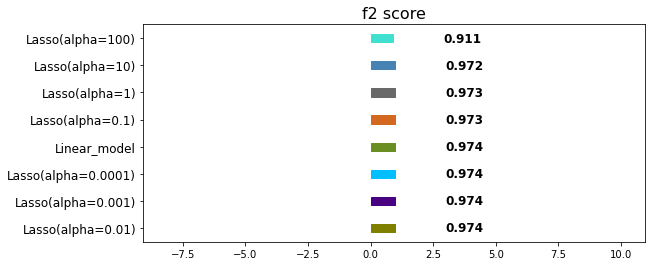

In [63]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    add_model('Lasso(alpha={})'.format(alpha), pred, y_test)
    add_f2_model('Lasso(alpha={})'.format(alpha), pred, y_test)
plot_all()
f2_plot_all()

## Ridge 모델 확인 및 시각화

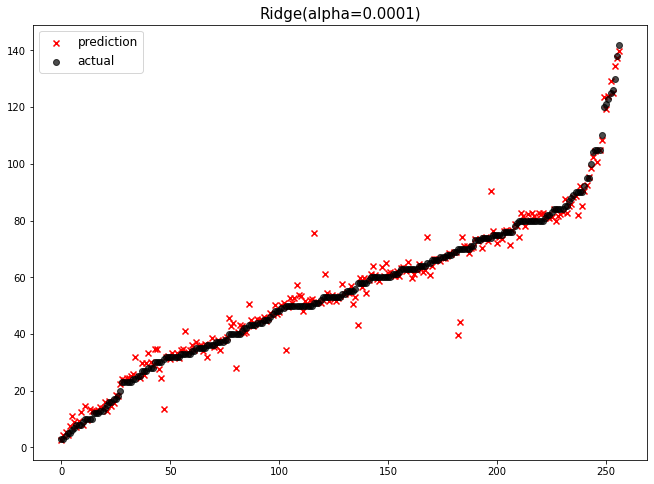

                  model        mse
0      Lasso(alpha=100)  45.274462
1       Lasso(alpha=10)  19.611709
2        Lasso(alpha=1)  19.483916
3      Lasso(alpha=0.1)  19.149125
4      Ridge(alpha=100)  18.930001
5          Linear_model  18.922120
6   Ridge(alpha=0.0001)  18.922119
7    Ridge(alpha=0.001)  18.922107
8     Ridge(alpha=0.01)  18.921984
9   Lasso(alpha=0.0001)  18.921436
10     Ridge(alpha=0.1)  18.920771
11   Lasso(alpha=0.001)  18.915819
12       Ridge(alpha=1)  18.910017
13    Lasso(alpha=0.01)  18.882317
14      Ridge(alpha=10)  18.865449


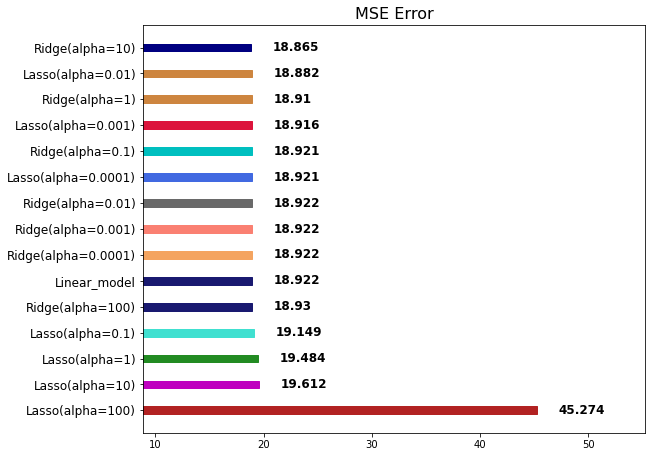

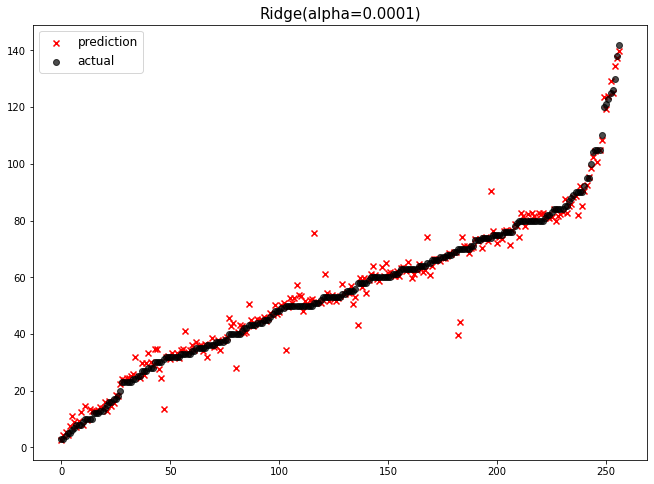

                  model        f2
0       Ridge(alpha=10)  0.973819
1     Lasso(alpha=0.01)  0.973799
2        Ridge(alpha=1)  0.973743
3    Lasso(alpha=0.001)  0.973734
4      Ridge(alpha=100)  0.973732
5      Ridge(alpha=0.1)  0.973726
6   Lasso(alpha=0.0001)  0.973724
7     Ridge(alpha=0.01)  0.973724
8    Ridge(alpha=0.001)  0.973723
9   Ridge(alpha=0.0001)  0.973723
10         Linear_model  0.973723
11     Lasso(alpha=0.1)  0.973414
12       Lasso(alpha=1)  0.972895
13      Lasso(alpha=10)  0.971861
14     Lasso(alpha=100)  0.910691


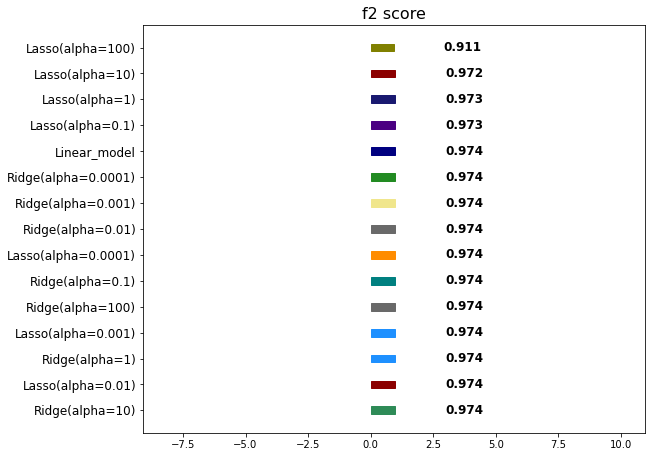

In [65]:
from sklearn.linear_model import Ridge

alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    add_model('Ridge(alpha={})'.format(alpha), pred, y_test)
    add_f2_model('Ridge(alpha={})'.format(alpha), pred, y_test)
plot_all()
f2_plot_all()